## Importing libraries, the model and the dataset:

In [ ]:
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
train_data = pd.read_csv('/content/train_data_TSA.csv', quotechar='"')
validation_data = pd.read_csv('/content/validation_data_labeled_TSA.csv', quotechar='"')   # baseline predicted TSA labels ('baseline_submission') are added for future convenience https://github.com/dialogue-evaluation/RuSentNE-evaluation/tree/main?tab=readme-ov-file

## Defining necessary functions:

In [ ]:
def insert_tar_tags(row):
    """
    function adds [TAR] tags highlighting the target entity in a sentence
    """
    sentence = row['sentence']
    start = row['entity_pos_start_rel']
    end = row['entity_pos_end_rel']

    return sentence[:start] + '[TAR]' + sentence[start:end] + '[TAR]' + sentence[end:]


def move_column_after(df):
    """
    moves 'tar_sentence' column right after 'sentene'
    """
    cols = df.columns.tolist()

    cols.insert(cols.index('sentence') + 1, cols.pop(cols.index('tar_sentence')))
    return df[cols]


def plot_label_values(df, title, ax=None):
    """
    draws a pie chart of TSA label percentage.
    """
    label_counts = df['label'].value_counts()
    labels = label_counts.index.astype(str)
    sizes = label_counts.values

    if ax is not None:
        ax.pie(sizes, labels=labels, autopct='%.2f', startangle=140)
        ax.set_title(title)
        ax.axis('equal')
    else:
        plt.figure(figsize=(5, 5))
        plt.pie(sizes, labels=labels, autopct='%.2f', startangle=140)
        plt.title(title)
        plt.axis('equal')
        plt.show()

## Adding special [TAR] tokens

In [ ]:
train_data['tar_sentence'] = train_data.apply(insert_tar_tags, axis=1)
train_data = move_column_after(train_data)

validation_data['tar_sentence'] = validation_data.apply(insert_tar_tags, axis=1)
validation_data = move_column_after(validation_data)

In [ ]:
validation_data

,sentence,tar_sentence,entity,entity_tag,entity_pos_start_rel,entity_pos_end_rel,label
0,Представители вооруженных сил Южной Кореи сооб...,Представители [TAR]вооруженных сил Южной Кореи...,вооруженных сил Южной Кореи,ORGANIZATION,14,41,0
1,В 2012 году Мурси победил во втором туре прези...,В 2012 году Мурси победил во втором туре [TAR]...,президентских,PROFESSION,41,54,0
2,В заключительной церемонии фестиваля примут уч...,В заключительной церемонии фестиваля примут уч...,журналисты,PROFESSION,129,139,0
3,"В своём последнем слове Лапшин заявил, что его...","В своём последнем слове Лапшин заявил, что его...",Азербайджана,COUNTRY,66,78,0
4,Однако после совещания судейского корпуса было...,Однако после совещания судейского корпуса было...,Спартака,ORGANIZATION,113,121,0
...,...,...,...,...,...,...,...
2840,В среду — 3 июля 2013 года российский прокурор...,В среду — 3 июля 2013 года российский прокурор...,руководителя фонда Hermitage Capital Management,PROFESSION,95,142,0
2841,"Следователи полагали, Саркози, воспользовавшис...","Следователи полагали, Саркози, воспользовавшис...",Лилиан Беттанкур,PERSON,57,73,0
2842,Власти Нигера приняли решение об отзыве своего...,Власти Нигера приняли решение об отзыве своего...,Катара,COUNTRY,56,62,-1
2843,Дэвид Долник — мэнеджер по маркетингу из калиф...,Дэвид Долник — [TAR]мэнеджер по маркетингу[TAR...,мэнеджер по маркетингу,PROFESSION,15,37,0


## Dividing val_data into two parts to have train, val and test:

In [ ]:
val_data, test_data = train_test_split(validation_data, test_size=0.45, random_state=42, shuffle=True, stratify=validation_data['label'])
val_data = val_data.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)

In [ ]:
train_data['label'] = train_data['label'] + 1    # for fine-tuning: negatibe label = 0, neutral = 1, positive = 2
val_data['label'] = val_data['label'] + 1
test_data['label'] = test_data['label'] + 1

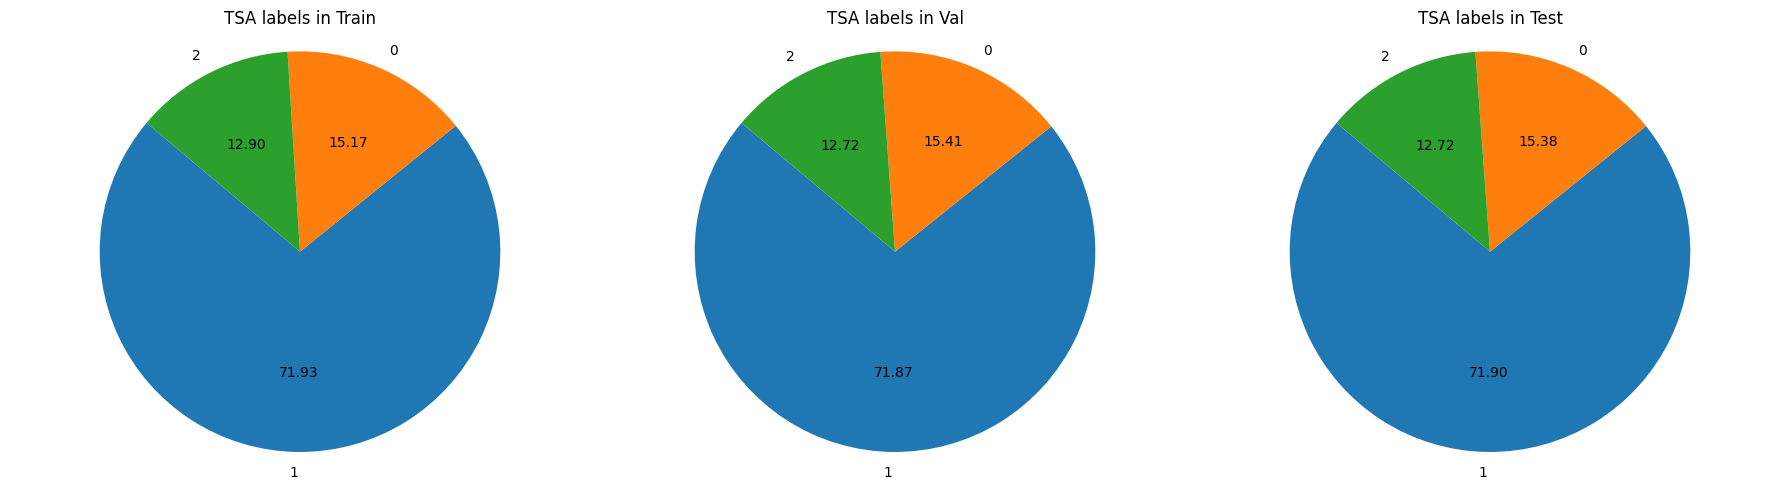

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

plot_label_values(train_data, 'TSA labels in Train', ax=axes[0])
plot_label_values(val_data, 'TSA labels in Val', ax=axes[1])
plot_label_values(test_data, 'TSA labels in Test', ax=axes[2])

plt.tight_layout()
plt.show()

## Saving a new version of the dataset:

In [ ]:
train_data.to_csv('upd_train_TSA_SA.csv', index=False)
val_data.to_csv('upd_val_TSA_SA.csv', index=False)
test_data.to_csv('upd_test_TSA_SA.csv', index=False)